In [1]:
!pip install seaborn
!pip install statsmodels
!pip install sklearn
!pip install lime
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

# To display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dell\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
dtf=pd.read_csv('Q1.csv')

# To print the shape of the dataset with rows and columns
print(dtf.shape)

(100000, 305)


In [3]:
dtf.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1540332,NaN,NaN,NaN,8.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,2,0,0,0,1,1,0,0,0,1,NaN,0,0,300.0,300.0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0.0,300.0,0,NaN,NaN,NaN,0,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.0000,0,0,NaN,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,706
1,823066,4.0,3.0,3.0,4.0,0,2,2,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,2,0,1,0,0,1,0,14,7,8,10,11,8,1,2,4,5,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,8,0,1,1,2,4,8,0,0,0,0,0,0,0,7,0,22375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,1,4582,4.0,4.0,4.0,0.9256,1,1,1,0.9339,5206,0,NaN,0,0,0,5206,0,5206,1,1,1,2,0,1.0,4.0,3.0,3.5,5206,5206,0.9339,0,NaN,5206,0.9339,1,1,1,0,NaN,0,NaN,558
2,1089795,NaN,NaN,NaN,96.0,1,0,0,0,1,3,4,1,0,9,0,9,2,0,9,0,2,0,0,0,0,1,0,0,3,4,0,0,0,0,1,0,0,0,0,NaN,0,0,1800.0,200.0,0,0,0,0,0,0,0,0,0,0,2,NaN,NaN,3,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,3287,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,106.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,0,NaN,0,0,0,0,0,5,0,0,0,0,5,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,1613,1026.0,1800.0,0,NaN,NaN,NaN,5,0,NaN,0,0,1,1,1,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.2281,1613,1613,0.4814,0,0,0,0,0,0,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,577
3,1147758,63.0,14.0,38.0,258.0,0,0,0,1,2,1,1,1,1,7,2,5,5,2,4,1,3,1,3,0,0,1,0,0,3,1,0,0,1,1,1,0,0,1,1,1.5200,300,-156,4000.0,100.0,0,0,0,0,0,0,0,0,0,0,2,1.52,1.5200,5,0,0,0,0,5,5,3,0,0,0,0,3,3,5,3,684,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,101.0,1,1,0,0,0,0,0,2,2,0,0,0,5,2,4,5,5,5,2,4,5

In [4]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

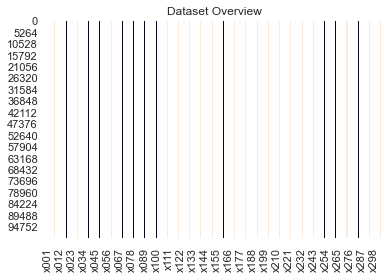

 Categorical   Numeric   NaN 


In [61]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [44]:
def outlier_analysis(dataframe, numerical_columns):

    '''
    Outlier Analysis of the numerical columns
    '''
    dtf_without_outliers = dataframe.copy()
    outlier_boundries_dict = {}
    for col in numerical_columns:
            print(f"-----{col}------")
            lower_limit = dataframe[col].quantile(q=0.01)
            upper_limit = dataframe[col].quantile(q=0.99)

            number_of_outliers = len(dataframe[(dataframe[col] < lower_limit) | (dataframe[col] > upper_limit)])
            if number_of_outliers>0:
                print(f"{number_of_outliers} outliers are found for {col} feature. \n")
            # outlier_boundries_dict[col] = (lower_limit,upper_limit)
            outlier_boundries_dict.update({col:(lower_limit,upper_limit)})

            dtf_without_outliers.loc[dtf[col]<lower_limit, col] = lower_limit
            dtf_without_outliers.loc[dtf[col]>upper_limit, col] = upper_limit
    
    return df_without_outliers, outlier_boundries_dic

In [45]:
outlier_analysis(dtf,num_cols)

-----x001------
2000 outliers are found for x001 feature. 

-----x002------
1641 outliers are found for x002 feature. 

-----x003------
995 outliers are found for x003 feature. 

-----x004------
1808 outliers are found for x004 feature. 

-----x005------
1868 outliers are found for x005 feature. 

-----x006------
-----x007------
869 outliers are found for x007 feature. 

-----x008------
926 outliers are found for x008 feature. 

-----x009------
787 outliers are found for x009 feature. 

-----x010------
718 outliers are found for x010 feature. 

-----x011------
932 outliers are found for x011 feature. 

-----x012------
833 outliers are found for x012 feature. 

-----x013------
812 outliers are found for x013 feature. 

-----x014------
872 outliers are found for x014 feature. 

-----x015------
933 outliers are found for x015 feature. 

-----x016------
885 outliers are found for x016 feature. 

-----x017------
945 outliers are found for x017 feature. 

-----x018------
418 outliers are fou

NameError: name 'df_without_outliers' is not defined

In [6]:
unique_val = dtf.nunique()
unique_val

x001    100000
x002       666
x003       457
x004       492
x005       699
         ...  
x301         2
x302         7
x303     15165
x304      8011
y          540
Length: 305, dtype: int64

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


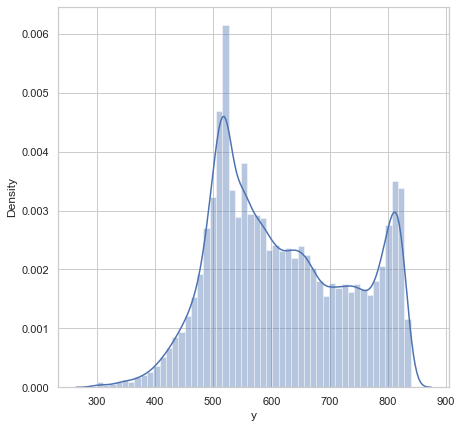

In [7]:
# To check the normality of the target variable
plt.figure(figsize = (7,7))
sns.set(style = "whitegrid")
f = sns.distplot(dtf["y"])

In [8]:
dtf.isnull().sum()

x001        0
x002    21432
x003    21432
x004    21424
x005     6110
        ...  
x301        0
x302    73069
x303        0
x304    81875
y           0
Length: 305, dtype: int64

In [9]:
dtf = dtf.fillna(dtf.mean())

In [12]:
dtf.isnull().sum()

x001    0
x002    0
x003    0
x004    0
x005    0
       ..
x301    0
x302    0
x303    0
x304    0
y       0
Length: 305, dtype: int64

In [13]:
## split data
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)

In [14]:
## print info
print("X_train shape:", dtf_train.drop("y",axis=1).shape, "| X_test shape:", dtf_test.drop("y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["y"]),2), "| y_test mean:", round(np.mean(dtf_test["y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("y",axis=1).columns.to_list())

X_train shape: (70000, 304) | X_test shape: (30000, 304)
y_train mean: 618.82 | y_test mean: 620.07
305 features: ['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009', 'x010', 'x011', 'x012', 'x013', 'x014', 'x015', 'x016', 'x017', 'x018', 'x019', 'x020', 'x021', 'x022', 'x023', 'x024', 'x025', 'x026', 'x027', 'x028', 'x029', 'x030', 'x031', 'x032', 'x033', 'x034', 'x035', 'x036', 'x037', 'x038', 'x039', 'x040', 'x041', 'x042', 'x043', 'x044', 'x045', 'x046', 'x047', 'x048', 'x049', 'x050', 'x051', 'x052', 'x053', 'x054', 'x055', 'x056', 'x057', 'x058', 'x059', 'x060', 'x061', 'x062', 'x063', 'x064', 'x065', 'x066', 'x067', 'x068', 'x069', 'x070', 'x071', 'x072', 'x073', 'x074', 'x075', 'x076', 'x077', 'x078', 'x079', 'x080', 'x081', 'x082', 'x083', 'x084', 'x085', 'x086', 'x087', 'x088', 'x089', 'x090', 'x091', 'x092', 'x093', 'x094', 'x095', 'x096', 'x097', 'x098', 'x099', 'x100', 'x101', 'x102', 'x103', 'x104', 'x105', 'x106', 'x107', 'x108', 'x109', 'x110', 'x111

In [15]:
cols = dtf_train.columns
num_cols = dtf_train._get_numeric_data().columns

In [16]:
num_cols

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x296', 'x297', 'x298', 'x299', 'x300', 'x301', 'x302', 'x303', 'x304',
       'y'],
      dtype='object', length=305)

In [17]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("y", axis=1))
dtf_train_scaled= pd.DataFrame(X, columns=dtf_train.drop("y", 
                        axis=1).columns, index=dtf_train.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_train_scaled['y'] = scalerY.fit_transform(
                    dtf_train['y'].values.reshape(-1,1))
dtf_train_scaled.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
71536,-0.647792,0.493286,3.806652,1.377054,0.243056,0.0,0.0,-0.5,0.0,0.0,-0.333333,0.5,0.5,0.142857,-0.266667,-0.2,-0.181818,0.25,0.0,0.000000,0.333333,0.5,0.5,-0.4,1.0,-1.0,0.0,1.0,-0.5,0.0,-0.333333,0.0,0.0,-0.5,0.00,-0.50,0.0,0.0,-0.5,-0.333333,-1.007438,0.336986,0.614819,-0.279488,-0.361363,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.191111,-0.621016,-0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.044562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044388,-0.423806,-0.464283,0.661640,0.713108,1.801017,1.330974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-0.639173,-0.208132,0.0,0.0,0.0,0.0,0.0,-0.157445,0.0,-0.085104,0.0,0.0,0.0,-0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.109734,0.000000,0.0,0.0,0.000000,0.000000,-1.0,-1.0,-1.0,0.0,0.000000,0.0,0.0,1.040816
74794,0.467058,0.880078,0.417803,-0.065254,0.805556,0.0,0.0,-0.5,0.5,3.0,1.000000,0.5,0.5,1.142857,0.733333,0.6,0.818182,1.25,1.5,0.444444,0.666667,1.0,0.5,1.4,1.0,0.0,0.0,4.0,3.5,0.6,0.166667,1.0,2.0,0.5,0.25,0.25,1.0,2.0,0.5,0.333333,-0.522905,0.638356,0.872211,1.376988,2.623809,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.237987,-0.840110,-0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.044562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.47482,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.0,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.5,1.0,0.0,0.0,0.

In [18]:
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_test.drop("y", axis=1))
dtf_test_scaled= pd.DataFrame(X, columns=dtf_test.drop("y", 
                        axis=1).columns, index=dtf_test.index)
## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_test_scaled['y'] = scalerY.fit_transform(
                    dtf_test['y'].values.reshape(-1,1))
dtf_test_scaled.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,x051,x052,x053,x054,x055,x056,x057,x058,x059,x060,x061,x062,x063,x064,x065,x066,x067,x068,x069,x070,x071,x072,x073,x074,x075,x076,x077,x078,x079,x080,x081,x082,x083,x084,x085,x086,x087,x088,x089,x090,x091,x092,x093,x094,x095,x096,x097,x098,x099,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141,x142,x143,x144,x145,x146,x147,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196,x197,x198,x199,x200,x201,x202,x203,x204,x205,x206,x207,x208,x209,x210,x211,x212,x213,x214,x215,x216,x217,x218,x219,x220,x221,x222,x223,x224,x225,x226,x227,x228,x229,x230,x231,x232,x233,x234,x235,x236,x237,x238,x239,x240,x241,x242,x243,x244,x245,x246,x247,x248,x249,x250,x251,x252,x253,x254,x255,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
3380,-0.387820,0.714310,-0.557071,0.678564,0.281690,0.0,1.0,0.0,1.5,3.0,0.333333,1.5,2.0,0.857143,1.000000,1.2,0.909091,1.25,2.0,0.222222,0.666667,0.5,0.5,2.6,1.0,0.0,0.0,3.0,3.5,0.2,-0.333333,0.0,0.0,-0.5,-0.25,-0.25,0.0,0.0,-0.5,-0.333333,0.618199,5.551740,3.243371,2.705877,7.305817,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.776730,-1.037389,-0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.043308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.47482,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.19105,-1.215178,1.5,1.5,1.5,3.0,2.0,1.0,0.0,0.0,0.0,0.784862,0.957980,0.728889,3.3280,0.989561,-0.564286,1.115143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,2.0,0.0,-1.0,0.0,-32.548057,-49.295015,-40.862389,270660.0,0.139238,1.0,1.0,1.0,1.0,4.679276,-24.7601,-19.155491,-21.857482,0.276392,1.0,1.0,1.0,0.136665,5.371469,0.000000,0.000000,0.0,0.0,0.0,5.735755,0.000000,8.762934,0.0,0.0,0.0,1.5,0.0,-0.746436,5.091991,-1.883852,5.935971,2.804045,5.567984,-2.601742,0.0,0.0,3.687618,-0.079934,0.0,0.0,0.0,0.0,-1.948758,7752.0,-0.743657,0.908629
77620,0.618186,-0.468382,2.924623,0.227584,0.028169,1.0,0.0,-0.5,0.0,0.0,-0.333333,1.0,1.5,0.142857,-0.066667,-0.4,0.181818,-0.25,-0.5,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.2,-0.333333,0.0,0.0,-0.5,0.00,-0.25,0.0,0.0,-0.5,0.000000,0.402396,-0.077922,-0.019034,-0.410874,-0.392786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,-0.119175,1.241080,0.000000,0.0,0.0,0.0,1.0,0.5,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.214779,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,-18.299446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,2.0,4.0,5.0,5.0,4.0,0.0,2.0,4.0,4.0,4.0,0.0,0.5,0.0,1.0,0.0,0.0,

In [19]:
dtf_train_scaled.shape

(70000, 305)

In [20]:
dtf_test_scaled.shape

(30000, 305)

In [21]:
X_train = dtf_train_scaled.drop("y",axis=1)
y_train = dtf_train_scaled["y"]

In [22]:
X_test = dtf_test_scaled.drop("y",axis=1)
y_test = dtf_test_scaled["y"]

In [23]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Feature 0: 1942.772710
Feature 1: 16133.351776
Feature 2: 855.004506
Feature 3: 11578.324085
Feature 4: 32303.566913
Feature 5: 609.191497
Feature 6: 4.303942
Feature 7: 36.943516
Feature 8: 0.017032
Feature 9: 144.134085
Feature 10: 893.478119
Feature 11: 1013.284397
Feature 12: 2263.537269
Feature 13: 20327.958237
Feature 14: 7422.051117
Feature 15: 2792.703786
Feature 16: 7043.087815
Feature 17: 14025.029995
Feature 18: 14566.546920
Feature 19: 14789.234729
Feature 20: 4466.830157
Feature 21: 33566.813674
Feature 22: 21137.790852
Feature 23: 237.902953
Feature 24: 21502.043994
Feature 25: 3349.166333
Feature 26: 15348.301420
Feature 27: 14623.747560
Feature 28: 3550.025184
Feature 29: 15513.514464
Feature 30: 5942.385895
Feature 31: 412.680804
Feature 32: 894.617629
Feature 33: 2670.799792
Feature 34: 4818.433169
Feature 35: 7565.030274
Feature 36: 605.562661
Feature 37: 1119.942465
Feature 38: 3455.511655
Feature 39: 6509.694384
Feature 40: 27928.261009
Feature 41: 7945.509133
Feat

In [24]:
# evaluation of a model using all input features
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.179


In [57]:
 
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=f_regression, k=250)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.100


In [58]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=mutual_info_regression, k=250)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 3.431


In [59]:
# compare different numbers of features selected using mutual information
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# define the evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LinearRegression()
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
# define the grid
grid = dict()
grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print('Best MAE: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))

Best MAE: -0.015
Best Config: {'sel__k': 294}
>-0.636 with: {'sel__k': 280}
>-0.635 with: {'sel__k': 281}
>-0.639 with: {'sel__k': 282}
>-0.643 with: {'sel__k': 283}
>-0.646 with: {'sel__k': 284}
>-0.659 with: {'sel__k': 285}
>-0.659 with: {'sel__k': 286}
>-0.670 with: {'sel__k': 287}
>-0.670 with: {'sel__k': 288}
>-0.676 with: {'sel__k': 289}
>-0.673 with: {'sel__k': 290}
>-0.674 with: {'sel__k': 291}
>-0.673 with: {'sel__k': 292}
>-0.675 with: {'sel__k': 293}
>-0.015 with: {'sel__k': 294}
>-0.015 with: {'sel__k': 295}
>-0.015 with: {'sel__k': 296}
>-0.015 with: {'sel__k': 297}
>-0.015 with: {'sel__k': 298}
>-0.015 with: {'sel__k': 299}
>-0.015 with: {'sel__k': 300}


>281 -0.096 (0.008)
>282 -0.096 (0.008)
>283 -0.096 (0.008)
>284 -0.096 (0.008)
>285 -0.096 (0.008)
>286 -0.096 (0.008)
>287 -0.096 (0.008)
>288 -0.097 (0.008)
>289 -0.097 (0.008)
>290 -0.097 (0.008)
>291 -0.097 (0.008)
>292 -0.097 (0.008)
>293 -0.097 (0.008)
>294 -0.097 (0.008)
>295 -0.097 (0.008)
>296 -0.097 (0.008)
>297 -0.097 (0.008)
>298 -0.097 (0.008)
>299 -0.097 (0.008)
>300 -0.098 (0.008)


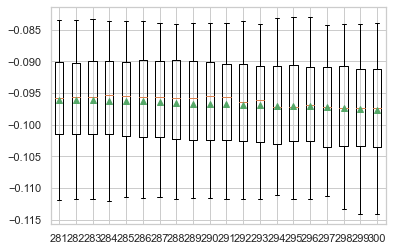

In [36]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# define number of features to evaluate
num_features = [i for i in range(X.shape[1]-19, X.shape[1]+1)]
# enumerate each number of features
results = list()
for k in num_features:
 # create pipeline
 model = LinearRegression()
 fs = SelectKBest(score_func=mutual_info_regression, k=k)
 pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
 # evaluate the model
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 results.append(scores)
 # summarize the results
 print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()